#Install Tensorflow 2.3

In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals

#!pip install -q tensorflow==2.3
import tensorflow as tf
config = tf.compat.v1.ConfigProto(gpu_options = 
                         tf.compat.v1.GPUOptions(per_process_gpu_memory_fraction=0.8)
# device_count = {'GPU': 1}
)
config.gpu_options.allow_growth = True
session = tf.compat.v1.Session(config=config)
tf.compat.v1.keras.backend.set_session(session)

print("GPU Available: ", tf.config.list_physical_devices('GPU'))

print("Tensorflow Version: ", tf.__version__)

GPU Available:  [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
Tensorflow Version:  2.3.0


If italicized text the GPU is not available, open Runtime -> Change runtime type and make sure that GPU is selected. Sometimes the GPU is still not available, you need to open Runtime -> reset all runtimes, then try again

In [2]:
print("Keras Version: ", tf.keras.__version__)

Keras Version:  2.4.0


In [3]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#Load Data 

In [4]:
#Mounting local folder
#from google.colab import drive
#drive.mount('/content/drive/')


In [5]:
#Setting the working directory
base_dir = 'D:\School\CMPE295B\TestNote\dataset\shapes'
print(base_dir)

D:\School\CMPE295B\TestNote\dataset\shapes


Use ImageDataGenerator to rescale the images: https://keras.io/preprocessing/image/

Create the train generator and specify where the train dataset directory, image size, batch size.

Create the validation generator with similar approach as the train generator with the flow_from_directory() method.

In [6]:
IMAGE_SIZE = 224
BATCH_SIZE = 64

datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255, 
    validation_split=0.2)

train_generator = datagen.flow_from_directory(
    base_dir,
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE, 
    subset='training')

val_generator = datagen.flow_from_directory(
    base_dir,
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE, 
    subset='validation')

Found 11976 images belonging to 4 classes.
Found 2994 images belonging to 4 classes.


In [7]:
image_batch_train, label_batch_train = next(iter(train_generator))
print("Image batch shape: ", image_batch_train.shape)
print("Label batch shape: ", label_batch_train.shape)

Image batch shape:  (64, 224, 224, 3)
Label batch shape:  (64, 4)


In [8]:
print (train_generator.class_indices)

{'circle': 0, 'square': 1, 'star': 2, 'triangle': 3}


In [9]:
# Learn about dataset labels
labels = '\n'.join(sorted(train_generator.class_indices.keys()))

with open('labels.txt', 'w') as f:
  f.write(labels)

In [10]:
!type labels.txt

circle
square
star
triangle


#Create Model 0

In [11]:
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras import optimizers
from keras.callbacks import EarlyStopping

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(IMAGE_SIZE, IMAGE_SIZE, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(train_generator.num_classes, activation='sigmoid'))

model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

#Early Stop to prevent over training
es = EarlyStopping(monitor='val_loss', mode='min')

In [12]:
history = model.fit(
      train_generator,
      steps_per_epoch=100,
      epochs=10,
      validation_data=val_generator,
      validation_steps=30)

Epoch 1/10
100/100 [==============================] - 60s 596ms/step - loss: 0.2917 - acc: 0.8999 - val_loss: 0.0222 - val_acc: 1.0000
Epoch 2/10
100/100 [==============================] - 26s 258ms/step - loss: 0.0317 - acc: 0.9889 - val_loss: 0.0022 - val_acc: 1.0000
Epoch 3/10
100/100 [==============================] - 15s 155ms/step - loss: 0.0079 - acc: 0.9977 - val_loss: 1.8936e-04 - val_acc: 1.0000
Epoch 4/10
100/100 [==============================] - 11s 109ms/step - loss: 0.0122 - acc: 0.9964 - val_loss: 0.0062 - val_acc: 0.9979
Epoch 5/10
100/100 [==============================] - 9s 91ms/step - loss: 0.0041 - acc: 0.9986 - val_loss: 5.0082e-05 - val_acc: 1.0000
Epoch 6/10
100/100 [==============================] - 7s 74ms/step - loss: 0.0030 - acc: 0.9991 - val_loss: 8.2567e-06 - val_acc: 1.0000
Epoch 7/10
100/100 [==============================] - 7s 68ms/step - loss: 5.6854e-04 - acc: 0.9998 - val_loss: 2.8306e-06 - val_acc: 1.0000
Epoch 8/10
100/100 [=====================

In [13]:
model.save('mymodel0.h5')

In [14]:
history.history

{'loss': [0.2916644513607025,
  0.03171934187412262,
  0.007883358746767044,
  0.012241838499903679,
  0.004109707660973072,
  0.0030168145895004272,
  0.0005685442592948675,
  0.00033574103144928813,
  0.00010968247806886211,
  0.0013449069811031222],
 'acc': [0.8999054431915283,
  0.9889062643051147,
  0.9976562261581421,
  0.9963745474815369,
  0.9985937476158142,
  0.9990542531013489,
  0.9998423457145691,
  0.9998437762260437,
  1.0,
  0.9995312690734863],
 'val_loss': [0.02219444513320923,
  0.0022025289945304394,
  0.0001893634907901287,
  0.006183150224387646,
  5.0081860536010936e-05,
  8.256686669483315e-06,
  2.8306253625487443e-06,
  2.4849566671036882e-06,
  7.066983584991249e-07,
  1.5811941693755216e-06],
 'val_acc': [1.0, 1.0, 1.0, 0.9979166388511658, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]}

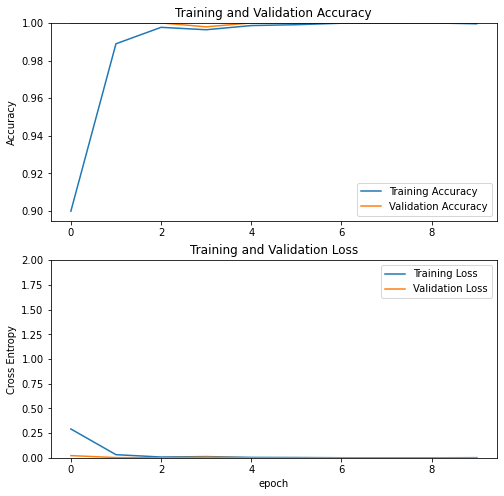

In [15]:
acc = history.history['acc']
val_acc = history.history['val_acc']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,2.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

#Create Model 1

Create the base model from the MobileNet V2 model developed at Google, and pre-trained on the ImageNet dataset, a large dataset of 1.4M images and 1000 classes of web images.

First, pick which intermediate layer of MobileNet V2 will be used for feature extraction. A common practice is to use the output of the very last layer before the flatten operation, the so-called "bottleneck layer". The reasoning here is that the following fully-connected layers will be too specialized to the task the network was trained on, and thus the features learned by these layers won't be very useful for a new task. The bottleneck features, however, retain much generality.

Let's instantiate an MobileNet V2 model pre-loaded with weights trained on ImageNet. By specifying the include_top=False argument, we load a network that doesn't include the classification layers at the top, which is ideal for feature extraction.

In [16]:
IMG_SHAPE = (IMAGE_SIZE, IMAGE_SIZE, 3)

# Create the base model from the pre-trained model MobileNet V2
base_model = tf.keras.applications.MobileNetV2(input_shape=IMG_SHAPE,
                                              include_top=False, 
                                              weights='imagenet')

In [17]:
base_model.trainable = False #freeze the convolutional base created from the previous step and use that as a feature extractor,

In [18]:
model = tf.keras.Sequential([
  base_model,
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.GlobalAveragePooling2D(),
  tf.keras.layers.Dense(4, activation='softmax')
])

In [19]:
model.compile(optimizer=tf.keras.optimizers.Adam(), 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

In [20]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenetv2_1.00_224 (Functi (None, 7, 7, 1280)        2257984   
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 5, 5, 32)          368672    
_________________________________________________________________
dropout (Dropout)            (None, 5, 5, 32)          0         
_________________________________________________________________
global_average_pooling2d (Gl (None, 32)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 4)                 132       
Total params: 2,626,788
Trainable params: 368,804
Non-trainable params: 2,257,984
_________________________________________________________________


In [21]:
epochs = 50

history = model.fit(train_generator, 
                    epochs=epochs, 
                    validation_data=val_generator)

Epoch 1/50
188/188 [==============================] - 11s 59ms/step - loss: 0.0400 - accuracy: 0.9910 - val_loss: 3.2541e-07 - val_accuracy: 1.0000
Epoch 2/50
188/188 [==============================] - 10s 55ms/step - loss: 1.6278e-06 - accuracy: 1.0000 - val_loss: 2.4092e-07 - val_accuracy: 1.0000
Epoch 3/50
188/188 [==============================] - 10s 55ms/step - loss: 1.1642e-06 - accuracy: 1.0000 - val_loss: 2.0596e-07 - val_accuracy: 1.0000
Epoch 4/50
188/188 [==============================] - 10s 55ms/step - loss: 1.1977e-06 - accuracy: 1.0000 - val_loss: 1.7968e-07 - val_accuracy: 1.0000
Epoch 5/50
188/188 [==============================] - 10s 55ms/step - loss: 1.6830e-06 - accuracy: 1.0000 - val_loss: 2.0893e-07 - val_accuracy: 1.0000
Epoch 6/50
188/188 [==============================] - 10s 55ms/step - loss: 5.4450e-07 - accuracy: 1.0000 - val_loss: 2.4129e-07 - val_accuracy: 1.0000
Epoch 7/50
188/188 [==============================] - 10s 54ms/step - loss: 6.0953e-07 - acc

In [22]:
model.save('mymodel1.h5')

In [23]:
history.history

{'loss': [0.03998751565814018,
  1.6278298744509812e-06,
  1.1642371191555867e-06,
  1.1976688938375446e-06,
  1.6829743572088773e-06,
  5.444987891678466e-07,
  6.095314120102557e-07,
  4.7527402102787164e-07,
  4.233717731949582e-07,
  2.6734548441709194e-07,
  1.9756434710416215e-07,
  1.660956172599981e-07,
  1.5553355581232609e-07,
  1.922506100981991e-07,
  9.474111095642002e-08,
  2.923846693647647e-07,
  8.612069990476812e-08,
  6.771684013529011e-08,
  7.804811730238725e-08,
  8.052597166852138e-08,
  7.144937796965678e-08,
  5.7673290143611666e-08,
  1.0602499855849601e-07,
  6.544682662479318e-08,
  4.9301942084412076e-08,
  8.148235508542712e-08,
  6.65705783831072e-08,
  4.298113864820152e-08,
  1.2578374253280344e-07,
  5.23078895753315e-08,
  4.006471243656051e-08,
  4.112967033620407e-08,
  4.20055812355713e-08,
  4.133871911449205e-08,
  4.596723002237013e-08,
  4.0850892446542275e-08,
  4.758906868573831e-08,
  5.1957965041538046e-08,
  6.066557034500875e-08,
  2.4188

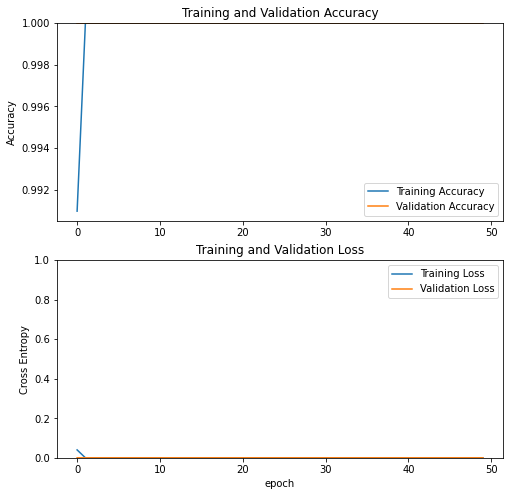

In [24]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()


# Model 2

Leveraging the Tensorflow hub
Model: https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4

In [25]:
#!pip install tensorflow_hub
import tensorflow_hub as hub
print("Hub version: ", hub.__version__)

Hub version:  0.9.0


In [26]:
model2 = tf.keras.Sequential([
  hub.KerasLayer("https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4", 
                 output_shape=[1280],
                 trainable=False),
  tf.keras.layers.Dropout(0.4),
  tf.keras.layers.Dense(train_generator.num_classes, activation='softmax')
])
model2.build([None, 224, 224, 3])

model2.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer (KerasLayer)     (None, 1280)              2257984   
_________________________________________________________________
dropout_1 (Dropout)          (None, 1280)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 4)                 5124      
Total params: 2,263,108
Trainable params: 5,124
Non-trainable params: 2,257,984
_________________________________________________________________


In [27]:
model2.compile(
  optimizer=tf.keras.optimizers.Adam(),
  loss='categorical_crossentropy',
  metrics=['acc'])

steps_per_epoch = np.ceil(train_generator.samples/train_generator.batch_size)
val_steps_per_epoch = np.ceil(val_generator.samples/val_generator.batch_size)

history2 = model2.fit(
    train_generator, 
    epochs=10,
    verbose=1,
    steps_per_epoch=steps_per_epoch,
    validation_data=val_generator,
    validation_steps=val_steps_per_epoch).history

Epoch 1/10
188/188 [==============================] - 11s 58ms/step - loss: 0.0981 - acc: 0.9654 - val_loss: 0.0032 - val_acc: 1.0000
Epoch 2/10
188/188 [==============================] - 10s 56ms/step - loss: 0.0035 - acc: 1.0000 - val_loss: 0.0012 - val_acc: 1.0000
Epoch 3/10
188/188 [==============================] - 10s 55ms/step - loss: 0.0018 - acc: 1.0000 - val_loss: 6.7741e-04 - val_acc: 1.0000
Epoch 4/10
188/188 [==============================] - 10s 55ms/step - loss: 0.0011 - acc: 1.0000 - val_loss: 4.3902e-04 - val_acc: 1.0000
Epoch 5/10
188/188 [==============================] - 10s 55ms/step - loss: 7.1115e-04 - acc: 1.0000 - val_loss: 3.2490e-04 - val_acc: 1.0000
Epoch 6/10
188/188 [==============================] - 10s 55ms/step - loss: 4.8403e-04 - acc: 1.0000 - val_loss: 2.4278e-04 - val_acc: 1.0000
Epoch 7/10
188/188 [==============================] - 10s 55ms/step - loss: 4.2153e-04 - acc: 1.0000 - val_loss: 1.8489e-04 - val_acc: 1.0000
Epoch 8/10
188/188 [==========

In [28]:
model2.save('mymodel2.h5')

In [29]:
history2

{'loss': [0.09814160317182541,
  0.003539726370945573,
  0.0017678487347438931,
  0.0010592007311061025,
  0.0007111541926860809,
  0.00048402821994386613,
  0.0004215320514049381,
  0.00032945230486802757,
  0.0002774244057945907,
  0.00022407376673072577],
 'acc': [0.9654308557510376, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 'val_loss': [0.003183711087331176,
  0.0012050522491335869,
  0.0006774120847694576,
  0.00043902391917072237,
  0.00032489580917172134,
  0.00024278323689941317,
  0.00018489068315830082,
  0.00015017106488812715,
  0.00012473775132093579,
  0.00010563360410742462],
 'val_acc': [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]}

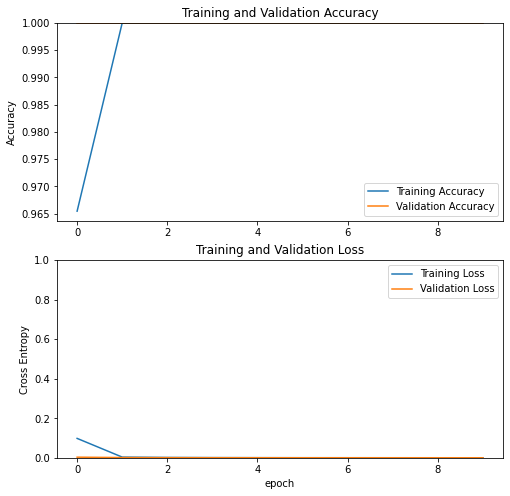

In [30]:
acc = history2['acc']
val_acc = history2['val_acc']

loss = history2['loss']
val_loss = history2['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

#Model3

Inception v3:  https://tfhub.dev/google/tf2-preview/inception_v3/classification/4

In [31]:
from keras import regularizers
model3 = tf.keras.Sequential([
  hub.KerasLayer("https://tfhub.dev/google/tf2-preview/inception_v3/classification/4", 
                 output_shape=[1001],
                 trainable=False),
  tf.keras.layers.Dropout(0.5),#0.4
  tf.keras.layers.Dense(64, kernel_regularizer=regularizers.l2(0.03), activation='relu'),#0.01
  tf.keras.layers.Dense(train_generator.num_classes, activation='softmax')
])
model3.build([None, 224, 224, 3])

model3.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer_1 (KerasLayer)   (None, 1001)              23853833  
_________________________________________________________________
dropout_2 (Dropout)          (None, 1001)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 64)                64128     
_________________________________________________________________
dense_5 (Dense)              (None, 4)                 260       
Total params: 23,918,221
Trainable params: 64,388
Non-trainable params: 23,853,833
_________________________________________________________________


In [32]:
model3.compile(
  optimizer=tf.keras.optimizers.Adam(),
  loss='categorical_crossentropy',
  metrics=['acc'])

steps_per_epoch = np.ceil(train_generator.samples/train_generator.batch_size)
val_steps_per_epoch = np.ceil(val_generator.samples/val_generator.batch_size)

history3 = model3.fit(
    train_generator, 
    epochs=30,
    verbose=1,
    steps_per_epoch=steps_per_epoch,
    validation_data=val_generator,
    validation_steps=val_steps_per_epoch).history

Epoch 1/30
188/188 [==============================] - 14s 75ms/step - loss: 1.3880 - acc: 0.9922 - val_loss: 0.2273 - val_acc: 1.0000
Epoch 2/30
188/188 [==============================] - 13s 68ms/step - loss: 0.0852 - acc: 1.0000 - val_loss: 0.0252 - val_acc: 0.9997
Epoch 3/30
188/188 [==============================] - 13s 67ms/step - loss: 0.0134 - acc: 1.0000 - val_loss: 0.0083 - val_acc: 0.9997
Epoch 4/30
188/188 [==============================] - 13s 69ms/step - loss: 0.0064 - acc: 1.0000 - val_loss: 0.0062 - val_acc: 0.9997
Epoch 5/30
188/188 [==============================] - 13s 69ms/step - loss: 0.0051 - acc: 1.0000 - val_loss: 0.0071 - val_acc: 0.9997
Epoch 6/30
188/188 [==============================] - 13s 69ms/step - loss: 0.0045 - acc: 1.0000 - val_loss: 0.0046 - val_acc: 0.9997
Epoch 7/30
188/188 [==============================] - 13s 68ms/step - loss: 0.0045 - acc: 1.0000 - val_loss: 0.0051 - val_acc: 0.9997
Epoch 8/30
188/188 [==============================] - 13s 69ms

In [33]:
model3.save('mymodel3.h5')

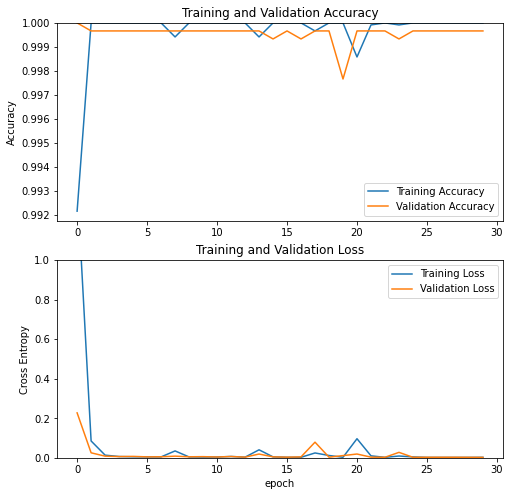

In [34]:
acc = history3['acc']
val_acc = history3['val_acc']

loss = history3['loss']
val_loss = history3['val_loss']

myfig=plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

In [35]:
myfig.savefig('evaluation.pdf')

In [36]:
#from google.colab import files
#files.download('evaluation.pdf')

#Load and Save models

In [37]:

#tf.savemodel()

SHAPE_SAVED_MODEL = "saved_models/shape"
#tf.keras.experimental.export_saved_model(model2, SHAPE_SAVED_MODEL)
model.save(SHAPE_SAVED_MODEL)


In [38]:
# Load SavedModel

#shapes_model = tf.keras.experimental.load_from_saved_model(SHAPE_SAVED_MODEL, 
#                                                            custom_objects={'KerasLayer':hub.KerasLayer})

shapes_model = tf.keras.models.load_model(SHAPE_SAVED_MODEL, custom_objects={'KerasLayer':hub.KerasLayer})

# Get images and labels batch from validation dataset generator

val_image_batch, val_label_batch = next(iter(val_generator))
true_label_ids = np.argmax(val_label_batch, axis=-1)

print("Validation batch shape:", val_image_batch.shape)

Validation batch shape: (64, 224, 224, 3)


In [39]:
tf_model_predictions = shapes_model.predict(val_image_batch)
print("Prediction results shape:", tf_model_predictions.shape)

Prediction results shape: (64, 4)


In [40]:
dataset_labels = sorted(train_generator.class_indices.items(), key=lambda pair:pair[1])
dataset_labels = np.array([key.title() for key, value in dataset_labels])
print(dataset_labels)

['Circle' 'Square' 'Star' 'Triangle']


In [41]:
# Convert prediction results to Pandas dataframe, for better visualization

tf_pred_dataframe = pd.DataFrame(tf_model_predictions)
tf_pred_dataframe.columns = dataset_labels

print("Prediction results for the first elements")
tf_pred_dataframe.head()

Prediction results for the first elements


,Circle,Square,Star,Triangle
0,1.362775e-18,1.551135e-17,1.000000e+00,4.053147e-31
1,1.000000e+00,2.188995e-17,4.849568e-19,2.889204e-24
2,1.000000e+00,2.032320e-17,8.675453e-19,3.364211e-27
3,3.992700e-12,1.000000e+00,2.650444e-12,1.365471e-10
4,1.611142e-16,2.203020e-15,1.000000e+00,1.086125e-27


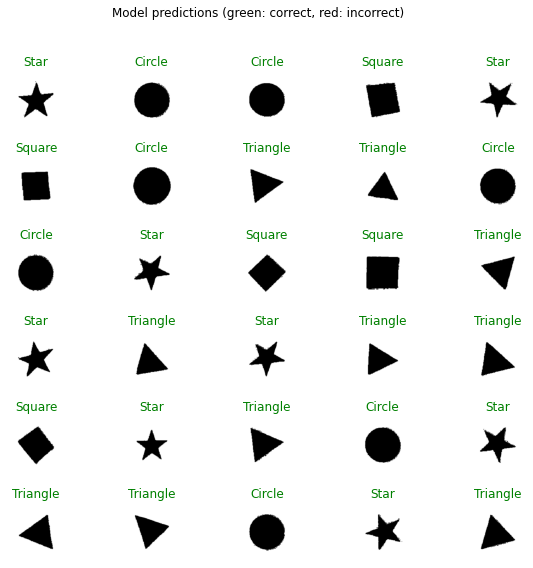

In [42]:
predicted_ids = np.argmax(tf_model_predictions, axis=-1)
predicted_labels = dataset_labels[predicted_ids]
# Print images batch and labels predictions

plt.figure(figsize=(10,9))
plt.subplots_adjust(hspace=0.5)
for n in range(30):
  plt.subplot(6,5,n+1)
  plt.imshow(val_image_batch[n])
  color = "green" if predicted_ids[n] == true_label_ids[n] else "red"
  plt.title(predicted_labels[n].title(), color=color)
  plt.axis('off')
_ = plt.suptitle("Model predictions (green: correct, red: incorrect)")

In [46]:
import cv2
import tensorflow as tf

CATEGORIES = ["circle", "square", "star", "triangle"]

def prepare(filepath):
    IMG_SIZE = 224
    img_array = cv2.imread(filepath, cv2.IMREAD_GRAYSCALE)
    new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
    return new_array.reshape(-1, IMG_SIZE, IMG_SIZE, 1)

from tensorflow.keras.models import load_model
new_model = load_model('mymodel1.h5')

In [47]:
new_model.summary()
#new_model.get_weights()
new_model.optimizer

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenetv2_1.00_224 (Functi (None, 7, 7, 1280)        2257984   
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 5, 5, 32)          368672    
_________________________________________________________________
dropout (Dropout)            (None, 5, 5, 32)          0         
_________________________________________________________________
global_average_pooling2d (Gl (None, 32)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 4)                 132       
Total params: 2,626,788
Trainable params: 368,804
Non-trainable params: 2,257,984
_________________________________________________________________


In [48]:
prediction = new_model.predict(['circle2.png'])
print(prediction)

W1025 12:11:25.468343  9396 functional.py:587] Model was constructed with shape (None, 224, 224, 3) for input Tensor("mobilenetv2_1.00_224_input_3:0", shape=(None, 224, 224, 3), dtype=float32), but it was called on an input with incompatible shape (None, 1).
W1025 12:11:25.469831  9396 functional.py:587] Model was constructed with shape (None, 224, 224, 3) for input Tensor("input_1_3:0", shape=(None, 224, 224, 3), dtype=float32), but it was called on an input with incompatible shape (None, 1).


ValueError: in user code:

    c:\program files (x86)\microsoft visual studio\shared\python37_64\lib\site-packages\tensorflow\python\keras\engine\training.py:1462 predict_function  *
        return step_function(self, iterator)
    c:\program files (x86)\microsoft visual studio\shared\python37_64\lib\site-packages\tensorflow\python\keras\engine\training.py:1452 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    c:\program files (x86)\microsoft visual studio\shared\python37_64\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:1211 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    c:\program files (x86)\microsoft visual studio\shared\python37_64\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2585 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    c:\program files (x86)\microsoft visual studio\shared\python37_64\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2945 _call_for_each_replica
        return fn(*args, **kwargs)
    c:\program files (x86)\microsoft visual studio\shared\python37_64\lib\site-packages\tensorflow\python\keras\engine\training.py:1445 run_step  **
        outputs = model.predict_step(data)
    c:\program files (x86)\microsoft visual studio\shared\python37_64\lib\site-packages\tensorflow\python\keras\engine\training.py:1418 predict_step
        return self(x, training=False)
    c:\program files (x86)\microsoft visual studio\shared\python37_64\lib\site-packages\tensorflow\python\keras\engine\base_layer.py:985 __call__
        outputs = call_fn(inputs, *args, **kwargs)
    c:\program files (x86)\microsoft visual studio\shared\python37_64\lib\site-packages\tensorflow\python\keras\engine\sequential.py:372 call
        return super(Sequential, self).call(inputs, training=training, mask=mask)
    c:\program files (x86)\microsoft visual studio\shared\python37_64\lib\site-packages\tensorflow\python\keras\engine\functional.py:386 call
        inputs, training=training, mask=mask)
    c:\program files (x86)\microsoft visual studio\shared\python37_64\lib\site-packages\tensorflow\python\keras\engine\functional.py:508 _run_internal_graph
        outputs = node.layer(*args, **kwargs)
    c:\program files (x86)\microsoft visual studio\shared\python37_64\lib\site-packages\tensorflow\python\keras\engine\base_layer.py:985 __call__
        outputs = call_fn(inputs, *args, **kwargs)
    c:\program files (x86)\microsoft visual studio\shared\python37_64\lib\site-packages\tensorflow\python\keras\engine\functional.py:386 call
        inputs, training=training, mask=mask)
    c:\program files (x86)\microsoft visual studio\shared\python37_64\lib\site-packages\tensorflow\python\keras\engine\functional.py:508 _run_internal_graph
        outputs = node.layer(*args, **kwargs)
    c:\program files (x86)\microsoft visual studio\shared\python37_64\lib\site-packages\tensorflow\python\keras\engine\base_layer.py:976 __call__
        self.name)
    c:\program files (x86)\microsoft visual studio\shared\python37_64\lib\site-packages\tensorflow\python\keras\engine\input_spec.py:180 assert_input_compatibility
        str(x.shape.as_list()))

    ValueError: Input 0 of layer Conv1_pad is incompatible with the layer: expected ndim=4, found ndim=2. Full shape received: [None, 1]


#Convert to TFLite

In [ ]:
#!mkdir "tflite_models"
TFLITE_MODEL = "tflite_models/shapes.tflite"
TFLITE_QUANT_MODEL = "tflite_models/shapes_quant.tflite"
# Get the concrete function from the Keras model.
run_model = tf.function(lambda x : shapes_model(x))

# Save the concrete function.
concrete_func = run_model.get_concrete_function(
    tf.TensorSpec(model.inputs[0].shape, model.inputs[0].dtype)
)

# Convert the model
converter = tf.lite.TFLiteConverter.from_concrete_functions([concrete_func])
converted_tflite_model = converter.convert()
open(TFLITE_MODEL, "wb").write(converted_tflite_model)

# Convert the model to quantized version with post-training quantization
converter = tf.lite.TFLiteConverter.from_concrete_functions([concrete_func])
converter.optimizations = [tf.lite.Optimize.OPTIMIZE_FOR_SIZE]
tflite_quant_model = converter.convert()
open(TFLITE_QUANT_MODEL, "wb").write(tflite_quant_model)

print("TFLite models and their sizes:")
!dir "tflite_models" -lh

#Save TFLite model

In [ ]:
#save model to Google drive
#from google.colab import drive
#drive.mount('/content/drive')
#gdrive_dataset_path = "/content/drive/My Drive/Colab Notebooks/dataset"

In [ ]:
!copy -r /content/saved_models "C:\Users\Tommy\Documents\jupyter\test1\tflite_models\"

In [ ]:
!copy -r /content/tflite_models "C:\Users\Tommy\Documents\jupyter\test1\tflite_models\"

In [ ]:
files.download('labels.txt')